<a href="https://colab.research.google.com/github/kdxxx/Internship-Files-2023-/blob/main/5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
dataset = pd.read_csv("Live.csv")
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

model.fit(dataset)
labels = model.predict(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
import numpy as np
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([2334, 4288,  428]))

In [8]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettes = []
ks = list(range(2, 12))

for n_cluster in ks:
  kmeans = KMeans(n_clusters= n_cluster).fit(dataset)
  label = kmeans.labels_
  sil_coeff = silhouette_score(dataset, label, metric = "euclidean")
  print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
  silhouettes.append(sil_coeff)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.8369757672176514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.7601867631720509


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.7272496988886102


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is 0.721432417358659


Text(0, 0.5, 'Silhoutte Score')

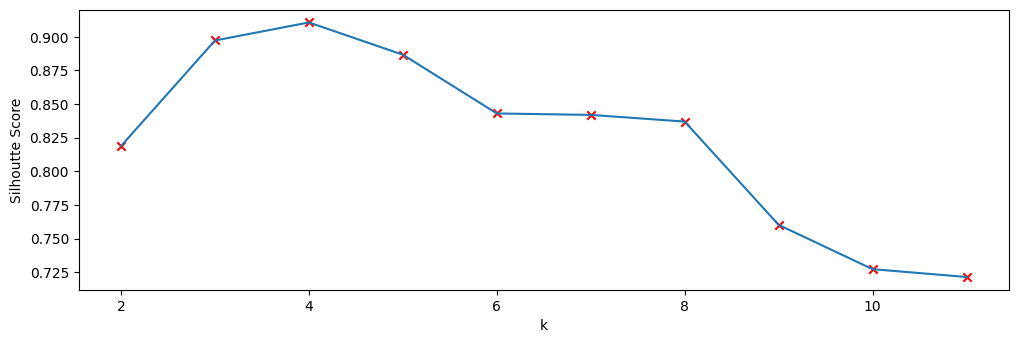

In [9]:
plt.figure(figsize = (12, 8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker = "x", c= "r")
plt.plot(ks, silhouettes)
plt.xlabel("k")
plt.ylabel("Silhoutte Score")

4 Clusters have better score.

In [10]:
# So let's try 4 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [11]:
dataset["labels"] = labels
dataset["labels"].value_counts()

0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64

Let's find the most common/popular groups

In [17]:
group_zero = dataset[dataset["labels"] == 0]["num_comments"].mean()
print(group_zero)

group_one = dataset[dataset["labels"] == 1]["num_comments"].mean()
print(group_one)

group_two = dataset[dataset["labels"] == 2]["num_comments"].mean()
print(group_two)

group_three = dataset[dataset["labels"] == 3]["num_comments"].mean()
print(group_three)

# the highest value shows us the most popular group.

0.0007619566531325948
0.030608773182480054
0.0017264581307471548
0.00027148226290672723


In [18]:
group_zero = dataset[dataset["labels"] == 0]["num_shares"].mean()
print(group_zero)

group_one = dataset[dataset["labels"] == 1]["num_shares"].mean()
print(group_one)

group_two = dataset[dataset["labels"] == 2]["num_shares"].mean()
print(group_two)

group_three = dataset[dataset["labels"] == 3]["num_shares"].mean()
print(group_three)

0.0007458736181824375
0.033785031713235436
0.0007473434899500528
0.001284119566829822


In [22]:
status_type = dataset[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)
dataset = pd.concat([dataset["labels"],status_type.rename("status_type")], axis=1)
dataset.groupby(["labels","status_type"])["status_type"].count()